In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0,10000.0,5.000000
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0,7570.0,5.120904
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0,10000.0,5.000000
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0,15500.0,4.809668


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [6]:
X = df['canonical_smiles']
y = df['pIC50']

In [7]:
tk = Tokenizer(char_level=True, lower=False)
tk.fit_on_texts(X)
tk.word_index

{'c': 1,
 'C': 2,
 '(': 3,
 ')': 4,
 '1': 5,
 'O': 6,
 '2': 7,
 'N': 8,
 '=': 9,
 '3': 10,
 '[': 11,
 ']': 12,
 '@': 13,
 'n': 14,
 '4': 15,
 'H': 16,
 '-': 17,
 '/': 18,
 'l': 19,
 '.': 20,
 '+': 21,
 'F': 22,
 '5': 23,
 'o': 24,
 'B': 25,
 'r': 26,
 'S': 27,
 '\\': 28,
 '#': 29,
 '6': 30,
 's': 31,
 'I': 32,
 'e': 33,
 'P': 34,
 '7': 35,
 '8': 36,
 'i': 37,
 'a': 38}

In [8]:
X_seq = tk.texts_to_sequences(X)
X_seq_pad = pad_sequences(X_seq)

In [9]:
X_seq_pad[max_len_idx]

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)

In [10]:
X_seq_pad[min_len_idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

# Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(y_train), len(X_test)

(4034, 4034, 1009)

# Data augmentation (Optional)

In [630]:
X_train = np.vstack([X_train, X_train[:, ::-1]])

In [631]:
X_train.shape

(8068, 207)

In [633]:
y_train = np.hstack([y_train, y_train])

In [634]:
y_train.shape

(8068,)

# Network Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [15]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [16]:
vocab_size = len(tk.word_index)
vocab_size

38

In [17]:
max_sequence_len = X_seq_pad.shape[1]

In [18]:
model = Sequential()
model.add(Embedding(vocab_size + 1, 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(100, return_sequences=False, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 207, 64)           2496      
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000    
_________________________________________________________________
dense (Dense)                (None, 50)                10050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
________________________________________________

In [20]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [21]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/100
32/32 [==============================] - 8s 183ms/step - loss: 19.9009 - R2: -6.5828 - val_loss: 26.6316 - val_R2: -8.0484
Epoch 2/100
32/32 [==============================] - 5s 170ms/step - loss: 11.4554 - R2: -3.4102 - val_loss: 19.5925 - val_R2: -5.6488
Epoch 3/100
32/32 [==============================] - 5s 169ms/step - loss: 7.3339 - R2: -1.8244 - val_loss: 14.3877 - val_R2: -3.8734
Epoch 4/100
32/32 [==============================] - 5s 170ms/step - loss: 4.4449 - R2: -0.6587 - val_loss: 9.1465 - val_R2: -2.0879
Epoch 5/100
32/32 [==============================] - 5s 170ms/step - loss: 2.8682 - R2: -0.0578 - val_loss: 7.6999 - val_R2: -1.5981
Epoch 6/100
32/32 [==============================] - 5s 170ms/step - loss: 2.4432 - R2: 0.1067 - val_loss: 11.7625 - val_R2: -2.9851
Epoch 7/100
32/32 [==============================] - 5s 170ms/step - loss: 2.2959 - R2: 0.1685 - val_loss: 7.4159 - val_R2: -1.5045
Epoch 8/100
32/32 [==============================] - 5s 170ms/ste

In [42]:
y_pred = model.predict(X_test)

# Score

In [43]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [44]:
r2
# 0.4984533246797399

-2.2295744744463684

In [45]:
# model.save('models/embed_64_bi_lstm_100_dense_50_bn.h5', )

# Load model (solo si se grabo el modelo)

In [46]:
from tensorflow.keras.models import load_model

In [473]:
# model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})

In [48]:
y_pred = model_loaded.predict(X_test)

In [475]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6913848492905522

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

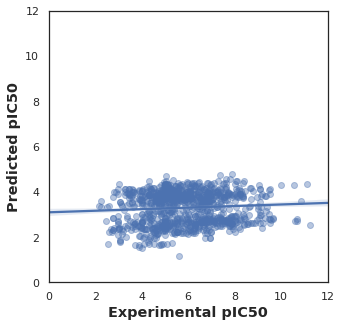

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# TSNE

In [50]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [51]:
embedings = model.layers[0].get_weights()[0][1:]

In [52]:
embedings.shape

(38, 64)

In [53]:
tsne = TSNE(2)
X_2d = tsne.fit_transform(embedings)

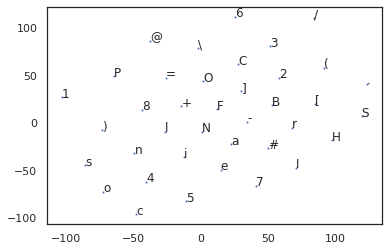

In [54]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1)
for i, t in enumerate(tk.word_index):
    plt.text(X_2d[i, 0], X_2d[i, 1], t)